#0.
Intro. a la Intro. de Machine Learning

Qué sabemos ?

1. Supervisado vs No Supervisado
2. Regresión vs Clasificación

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

#1. Intro. a dimensiones.

En los problemas del dia a dia nos encontramos usualmente con problemas de una, dos o tres dimensiones.
Conocemos sus gráficos para visualizar, técnicas para calcular distancias o posiciones, y maneras de "mapear" o transformar de una dimension a otra.
Pero, qué pasa cuando tenemos 4, 5,...1000 dimensiones ?

Cuando nos encontramos con este problema, necesitamos usar tecnicas de reducción de dimensionalidad.
Existen muchas técnicas de reducción; Missing Values, Low Variance, Decision Trees, Random Forest, High Correlation, Backward Feature Elimination, Factor Analysis, entre otras.

Cuáles son los beneficios de la Reducción de Dimensionalidad ?
- Ayuda a comprimir datos y, con esto, el espacio necesario para almacenarlos.
- Reduce el tiempo de procesamiento para los mismos computos. Menos dimensiones = menos tiempo de procesamiento
- Nos permite usar algoritmos que no podriamos usar con muchas dimensiones
- Ayuda a eliminar features innecesarias
- Nos ayuda a visualizar


La primera que veremos se llama PCA (Principal Component Analysis).

- Qué es PCA ?

Es un método para comprimir muchos datos con multiples dimensiones a algo en que podamos capturar la "esencia" de los datos, para poder asi visualizarla y representarla de manera más interpretable, por medio de la selección de las componentes más importantes o influyentes de los datos que tenemos.

Leer la documentacion en: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

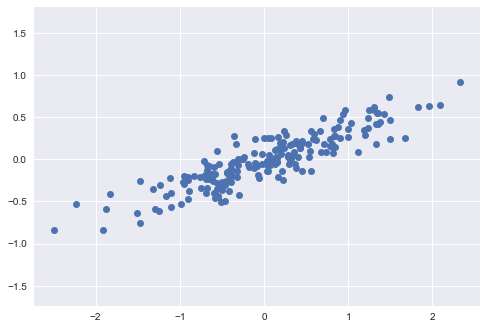

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)


[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


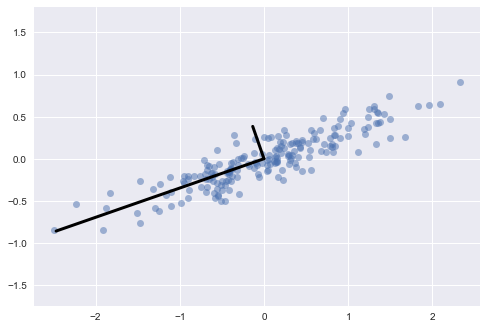

In [4]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [5]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


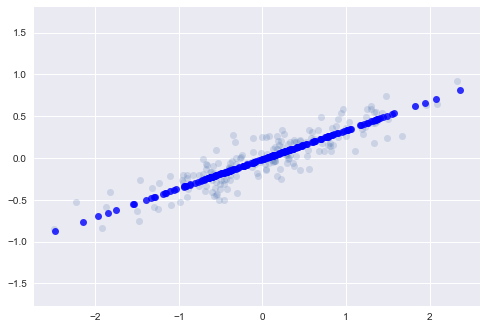

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
# Pero, que es ese alpha que esta metido ahi ?
# Leer https://es.wikipedia.org/wiki/Alfa_de_Cronbach
plt.axis('equal');

Otro ejemplo de lo que hace el algoritmo PCA, pero ahora de 3d a 2D: 

http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py


Una vez que logramos reducir dimensionalidades, nos toca buscar patrones, grupos o similitudes entre los datos. Ahora viene la parte de "clustering" o "agrupacion" de la informacion que tenemos.

Existen muchas tecnicas para hacer clusters; podemos usar tecnicas de densidad, de centroides, de distribucion, entre otras.
Para esta Tarea, nos enfocaremos en un tipo especifico de clusters por centroides, llamado K-Means.


- Qué es K-means ?

Es un método de agrupamiento con el objetivo de particionar n observaciones en k grupos.

Parametro de agrupamiento ? Valor medio (o distancia euclediana)






Visualizaciones de K-Means:

1: http://www.nntext.com/project3/

2: http://www.nntext.com/project1/


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

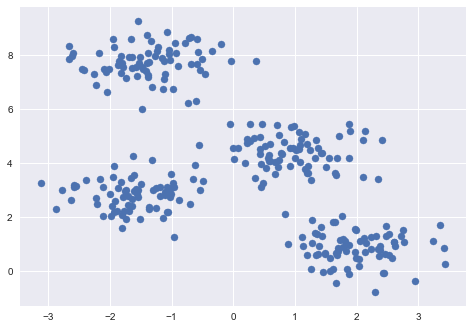

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

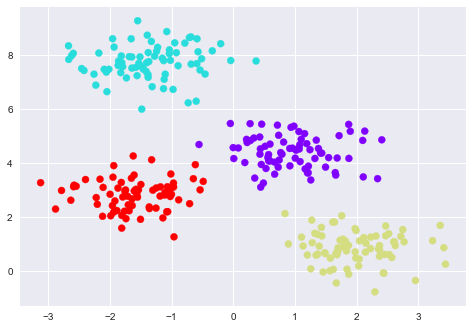

In [9]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

**Ejemplo interesante de K-Means:**
Comprimir imagenes

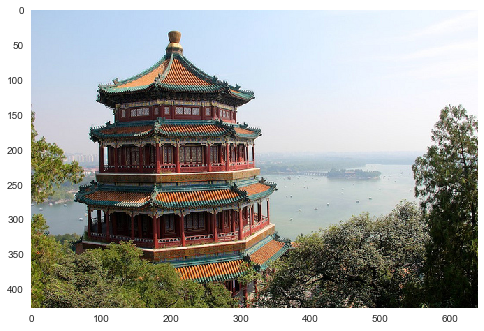

In [10]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

In [11]:
china.shape


(427, 640, 3)

In [12]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


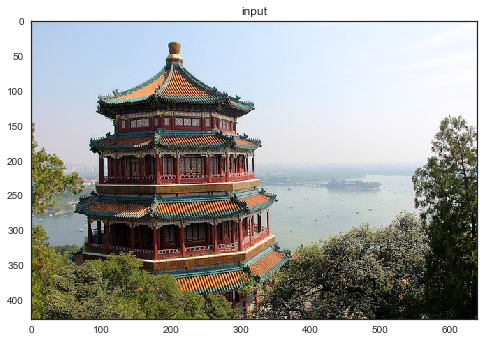

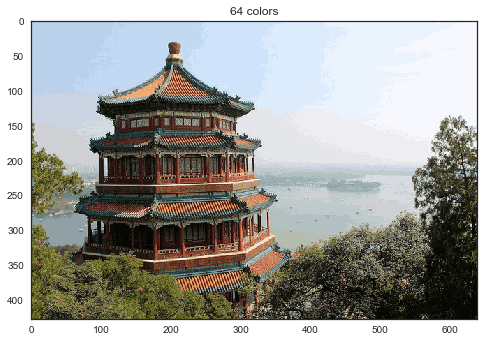

In [13]:
# Para mayor rapidez, reducir el tamaño de china con image = china[::3, ::3]
image = china
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Por ultimo, **t-SNE**

Nota interesante: http://distill.pub/2016/misread-tsne/

Documentacion: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Otra lectura interesante: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/


t-SNE, o T-Distributed Stochastic Neighbour Embedding, es una técnica que toma una serie de puntos en algún espacio de muchas dimensiones y busca una representación fiel de esos puntos, con el objetivo de visualizarlos en algún plano de menor dimensión.

Es necesario entender los factores que inciden en el algoritmo, ya que tiene ciertas sutilezas que pueden hacerlo dificil de entender e interpretar. El algoritmo es no linear, tiene una complejidad no concava y se adapta a los datos, realizando transformaciones diferentes para regiones diferentes. 


In [14]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [15]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [16]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

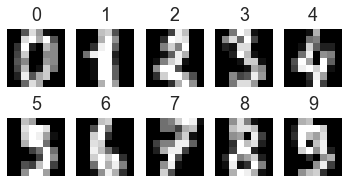

In [17]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [18]:
# We first reorder the data points according to the handwritten numbers.

X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

In [19]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [20]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<matplotlib.figure.Figure at 0x115051898>,
  <matplotlib.text.Text at 0x113f635f8>])

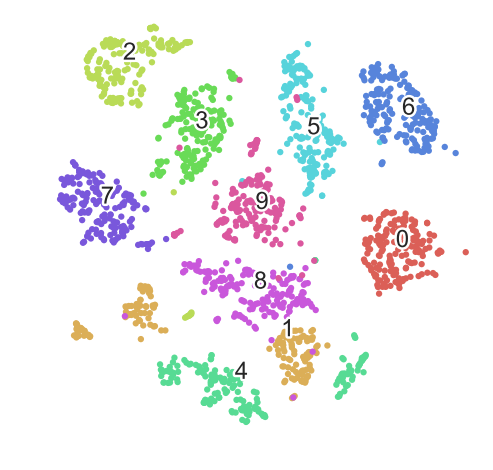

In [21]:
scatter(digits_proj, y)


"The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map."

In [22]:
Para leer; es la reducción de información una buena practica ? 

Depende, https://discuss.analyticsvidhya.com/t/dimensionality-reduction-is-good-or-bad/2444/4

SyntaxError: invalid syntax (<ipython-input-22-14c6deb0b9b1>, line 1)